In [1]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install scikit-learn
%pip install seaborn


[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, ElasticNet
import csv
import seaborn as sns
from typing import Any

In [4]:
path1 = f"../data/round_5/trades_round_1_day_-2_wn.csv"
path2 = f"../data/round_5/trades_round_1_day_-1_wn.csv"
path3 = f"../data/round_5/trades_round_1_day_0_wn.csv"

path4 = f"../data/round_5/trades_round_3_day_0_wn.csv"
path5 = f"../data/round_5/trades_round_3_day_1_wn.csv"
path6 = f"../data/round_5/trades_round_3_day_2_wn.csv"

path7 = f"../data/round_5/trades_round_4_day_1_wn.csv"
path8 = f"../data/round_5/trades_round_4_day_2_wn.csv"
path9 = f"../data/round_5/trades_round_4_day_3_wn.csv"

# Day 1 Analysis

In [5]:
data1 = pd.read_csv(path1, delimiter=";", parse_dates=True)
data2 = pd.read_csv(path2, delimiter=";", parse_dates=True)
data3 = pd.read_csv(path3, delimiter=";", parse_dates=True)

In [6]:
data = pd.concat([data1, data2, data3], ignore_index=True)
data

,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,Vinnie,Ruby,AMETHYSTS,SEASHELLS,9996.0,1
1,0,Remy,Valentina,STARFRUIT,SEASHELLS,5003.0,1
2,0,Remy,Ruby,AMETHYSTS,SEASHELLS,9996.0,1
3,100,Ruby,Valentina,STARFRUIT,SEASHELLS,5004.0,6
4,900,Rhianna,Valentina,STARFRUIT,SEASHELLS,5001.0,2
...,...,...,...,...,...,...,...
16145,998800,Valentina,Remy,STARFRUIT,SEASHELLS,5050.0,1
16146,998800,Rhianna,Remy,AMETHYSTS,SEASHELLS,10002.0,1
16147,999500,Valentina,Remy,AMETHYSTS,SEASHELLS,9995.0,2
16148,999500,Valentina,Remy,STARFRUIT,SEASHELLS,5049.0,2


In [30]:
set(data["buyer"].to_list())

{'Adam',
 'Amelia',
 'Remy',
 'Rhianna',
 'Ruby',
 'Valentina',
 'Vinnie',
 'Vladimir'}

In [34]:
# data["buyer"].hist(['Adam',
#  'Amelia',
#  'Remy',
#  'Rhianna',
#  'Ruby',
#  'Valentina',
#  'Vinnie',
#  'Vladimir'])
# data["seller"].hist()

<Axes: >

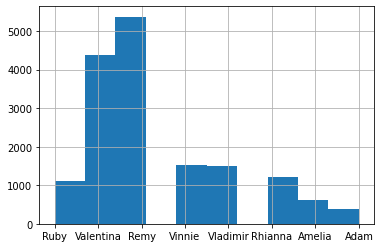

In [27]:
data["seller"].hist()

In [45]:
# snakes = ["Vinnie", "Remy", "Ruby", "Rhianna", "Valentina", "Vladimir", "Adam", "Amelia"]

# for snake in snakes:
#     eval(f"{snake}_data = pd.concat([data[data[\"buyer\"] == {snake}], data[data[\"seller\"] == {snake}]], ignore_index=True)")
# Remy_data = data[Any(data["buyer"] == "Remy", data["seller"] == "Remy")]

Vinnie_data = data[data["buyer"] == "Vinnie"]
Remy_data= data[data["buyer"] == "Remy"] 
Ruby_data = data[data["buyer"] == "Ruby"]
Rhia_data = data[data["buyer"] == "Rhianna"]
Vale_data = data[data["buyer"] == "Valentina"]
Vlad_data = data[data["buyer"] == "Vladimir"]
Adam_data = data[data["buyer"] == "Adam"]
Amel_data = data[data["buyer"] == "Amelia"]


<Axes: >

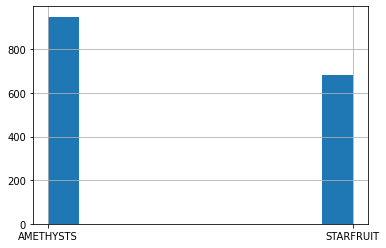

In [46]:

# data[data["buyer"] == "Vinnie"]["symbol"].hist()
Vinnie_data["symbol"].hist()

<Axes: >

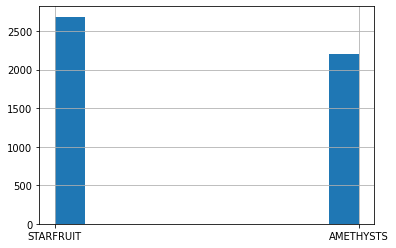

In [15]:
Remy_data["symbol"].hist()

<Axes: >

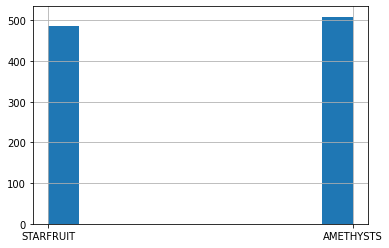

In [17]:
Ruby_data["symbol"].hist()

<Axes: >

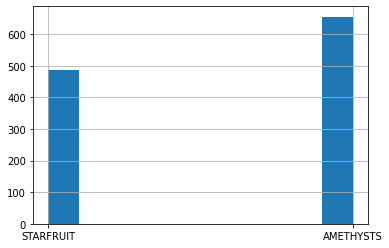

In [18]:
Rhia_data["symbol"].hist()

<Axes: >

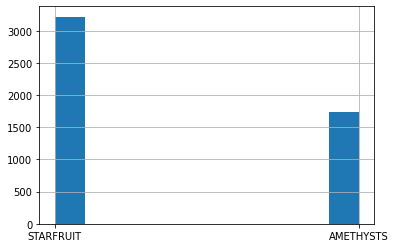

In [19]:
Vale_data["symbol"].hist()

<Axes: >

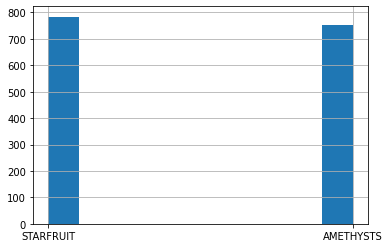

In [20]:
Vlad_data["symbol"].hist()

<Axes: >

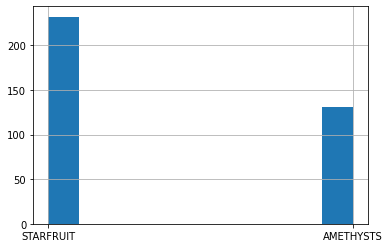

In [21]:
Adam_data["symbol"].hist()

<Axes: >

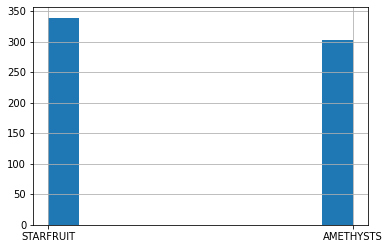

In [22]:
Amel_data["symbol"].hist()

# Day 2 Analysis of cross-person trades

In [53]:
data["buyer-seller"] = data["buyer"] + "-" + data["seller"]
data

,timestamp,buyer,seller,symbol,currency,price,quantity,buyer-seller
0,0,Vinnie,Ruby,AMETHYSTS,SEASHELLS,9996.0,1,Vinnie-Ruby
1,0,Remy,Valentina,STARFRUIT,SEASHELLS,5003.0,1,Remy-Valentina
2,0,Remy,Ruby,AMETHYSTS,SEASHELLS,9996.0,1,Remy-Ruby
3,100,Ruby,Valentina,STARFRUIT,SEASHELLS,5004.0,6,Ruby-Valentina
4,900,Rhianna,Valentina,STARFRUIT,SEASHELLS,5001.0,2,Rhianna-Valentina
...,...,...,...,...,...,...,...,...
16145,998800,Valentina,Remy,STARFRUIT,SEASHELLS,5050.0,1,Valentina-Remy
16146,998800,Rhianna,Remy,AMETHYSTS,SEASHELLS,10002.0,1,Rhianna-Remy
16147,999500,Valentina,Remy,AMETHYSTS,SEASHELLS,9995.0,2,Valentina-Remy
16148,999500,Valentina,Remy,STARFRUIT,SEASHELLS,5049.0,2,Valentina-Remy


In [60]:
# plt.hist(list(set(data["buyer-seller"].tolist())))
data["buyer-seller"]

0              Vinnie-Ruby
1           Remy-Valentina
2                Remy-Ruby
3           Ruby-Valentina
4        Rhianna-Valentina
               ...        
16145       Valentina-Remy
16146         Rhianna-Remy
16147       Valentina-Remy
16148       Valentina-Remy
16149        Vladimir-Remy
Name: buyer-seller, Length: 16150, dtype: object

# Day 3 Analysis

In [23]:
data4 = pd.read_csv(path4, delimiter=";", parse_dates=True)
data5 = pd.read_csv(path5, delimiter=";", parse_dates=True)
data6 = pd.read_csv(path6, delimiter=";", parse_dates=True)

In [24]:
day3 = pd.concat([data4, data5, data6], ignore_index=True)
day3

,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,Remy,Vinnie,ROSES,SEASHELLS,15001.0,3
1,0,Remy,Vinnie,CHOCOLATE,SEASHELLS,8001.0,8
2,200,Vinnie,Rhianna,ROSES,SEASHELLS,15000.0,3
3,500,Vinnie,Remy,STRAWBERRIES,SEASHELLS,3999.0,10
4,1000,Ruby,Vinnie,GIFT_BASKET,SEASHELLS,71360.0,2
...,...,...,...,...,...,...,...
11367,997900,Ruby,Vladimir,GIFT_BASKET,SEASHELLS,69478.0,5
11368,998400,Remy,Vinnie,STRAWBERRIES,SEASHELLS,3985.0,4
11369,998800,Vinnie,Remy,CHOCOLATE,SEASHELLS,7752.0,7
11370,998900,Vinnie,Remy,ROSES,SEASHELLS,14404.0,5


<Axes: >

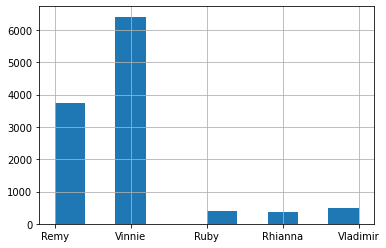

In [25]:
day3["buyer"].hist()

<Axes: >

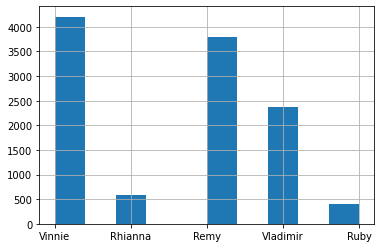

In [26]:
day3["seller"].hist()

In [88]:
remy_3 = day3[day3["buyer"] == "Remy"]
vinnie_3 = day3[day3["buyer"] == "Vinnie"]
vlad_3 = day3[day3["buyer"] == "Vladimir"]
rhianna = day3[day3["seller"] == "Rhianna"]
remy_3

,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,Remy,Vinnie,ROSES,SEASHELLS,15001.0,3
1,0,Remy,Vinnie,CHOCOLATE,SEASHELLS,8001.0,8
5,1200,Remy,Vinnie,ROSES,SEASHELLS,14997.0,1
8,2600,Remy,Vinnie,ROSES,SEASHELLS,14974.0,5
9,2800,Remy,Vinnie,STRAWBERRIES,SEASHELLS,4001.0,10
...,...,...,...,...,...,...,...
11359,996500,Remy,Vinnie,ROSES,SEASHELLS,14392.0,1
11363,997200,Remy,Vinnie,STRAWBERRIES,SEASHELLS,3983.0,6
11365,997600,Remy,Vinnie,ROSES,SEASHELLS,14392.0,2
11366,997700,Remy,Vinnie,STRAWBERRIES,SEASHELLS,3983.0,5


<Axes: >

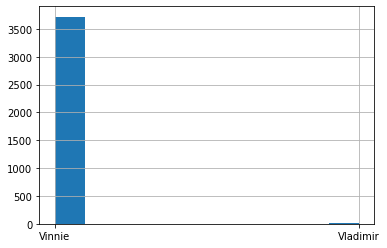

In [64]:
remy_3["seller"].hist()

<Axes: >

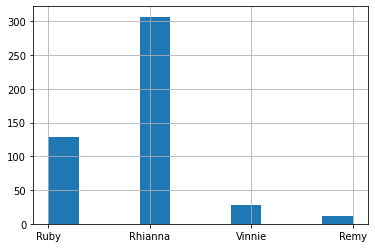

In [66]:
vlad_3["seller"].hist()

<Axes: >

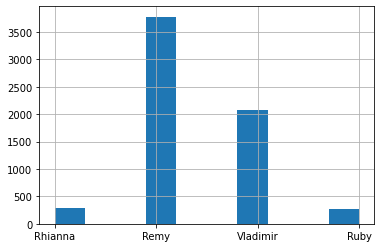

In [67]:
vinnie_3["seller"].hist()

In [68]:
vinnie_3

,timestamp,buyer,seller,symbol,currency,price,quantity
2,200,Vinnie,Rhianna,ROSES,SEASHELLS,15000.0,3
3,500,Vinnie,Remy,STRAWBERRIES,SEASHELLS,3999.0,10
6,1300,Vinnie,Vladimir,CHOCOLATE,SEASHELLS,8000.0,7
7,1400,Vinnie,Remy,ROSES,SEASHELLS,14994.0,3
15,3500,Vinnie,Vladimir,STRAWBERRIES,SEASHELLS,4000.0,7
...,...,...,...,...,...,...,...
11362,997100,Vinnie,Remy,CHOCOLATE,SEASHELLS,7747.0,8
11364,997500,Vinnie,Vladimir,STRAWBERRIES,SEASHELLS,3982.0,7
11369,998800,Vinnie,Remy,CHOCOLATE,SEASHELLS,7752.0,7
11370,998900,Vinnie,Remy,ROSES,SEASHELLS,14404.0,5


In [89]:
rhianna

,timestamp,buyer,seller,symbol,currency,price,quantity
2,200,Vinnie,Rhianna,ROSES,SEASHELLS,15000.0,3
90,21800,Vladimir,Rhianna,GIFT_BASKET,SEASHELLS,71403.0,4
92,21800,Vinnie,Rhianna,GIFT_BASKET,SEASHELLS,71404.0,1
109,27700,Vinnie,Rhianna,GIFT_BASKET,SEASHELLS,71402.0,2
110,27700,Vladimir,Rhianna,GIFT_BASKET,SEASHELLS,71402.0,4
...,...,...,...,...,...,...,...
11171,944300,Vladimir,Rhianna,GIFT_BASKET,SEASHELLS,69517.0,4
11181,948100,Vladimir,Rhianna,GIFT_BASKET,SEASHELLS,69634.0,3
11276,974200,Vladimir,Rhianna,GIFT_BASKET,SEASHELLS,69682.0,6
11277,974200,Vinnie,Rhianna,GIFT_BASKET,SEASHELLS,69683.0,1


<Axes: >

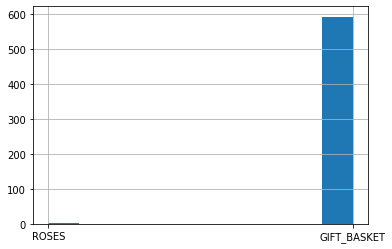

In [90]:
rhianna["symbol"].hist()

# Day 4 Analysis

In [69]:
data7 = pd.read_csv(path7, delimiter=";", parse_dates=True)
data8 = pd.read_csv(path8, delimiter=";", parse_dates=True)
data9 = pd.read_csv(path9, delimiter=";", parse_dates=True)

In [71]:
day_4 = pd.concat([data7, data8, data9], ignore_index=True)
day_4

,timestamp,buyer,seller,symbol,currency,price,quantity
0,800,Valentina,Valentina,COCONUT_COUPON,SEASHELLS,636.0,5
1,900,Valentina,Vinnie,COCONUT_COUPON,SEASHELLS,634.0,17
2,1100,Valentina,Ruby,COCONUT_COUPON,SEASHELLS,635.0,17
3,1900,Valentina,Vinnie,COCONUT_COUPON,SEASHELLS,635.0,16
4,2000,Valentina,Vinnie,COCONUT_COUPON,SEASHELLS,637.0,14
...,...,...,...,...,...,...,...
5124,996200,Valentina,Vinnie,COCONUT_COUPON,SEASHELLS,585.0,14
5125,997100,Vinnie,Vinnie,COCONUT,SEASHELLS,9885.0,9
5126,997200,Vinnie,Vinnie,COCONUT,SEASHELLS,9883.0,8
5127,998600,Vinnie,Raj,COCONUT,SEASHELLS,9887.0,5


<Axes: >

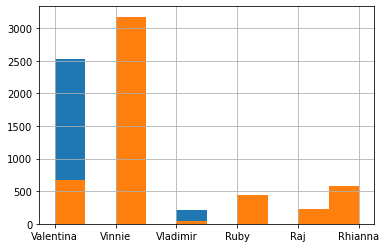

In [84]:
day_4["buyer"].hist()
day_4["seller"].hist()

In [80]:
vinnie_4 = day_4[day_4["buyer"] == "Vinnie"]
valentina_4 = day_4[day_4["buyer"] == "Valentina"]
ruby_4 = day_4[day_4["buyer"] == "Ruby"]
vinnie_4

,timestamp,buyer,seller,symbol,currency,price,quantity
6,3900,Vinnie,Vinnie,COCONUT_COUPON,SEASHELLS,635.0,2
12,5200,Vinnie,Vinnie,COCONUT,SEASHELLS,9997.0,8
21,10900,Vinnie,Vinnie,COCONUT,SEASHELLS,10007.0,10
22,12500,Vinnie,Raj,COCONUT,SEASHELLS,10003.0,10
26,14900,Vinnie,Vinnie,COCONUT,SEASHELLS,10004.0,10
...,...,...,...,...,...,...,...
5122,994900,Vinnie,Vinnie,COCONUT,SEASHELLS,9885.0,9
5123,995500,Vinnie,Vinnie,COCONUT,SEASHELLS,9887.0,8
5125,997100,Vinnie,Vinnie,COCONUT,SEASHELLS,9885.0,9
5126,997200,Vinnie,Vinnie,COCONUT,SEASHELLS,9883.0,8


In [81]:
valentina_4

,timestamp,buyer,seller,symbol,currency,price,quantity
0,800,Valentina,Valentina,COCONUT_COUPON,SEASHELLS,636.0,5
1,900,Valentina,Vinnie,COCONUT_COUPON,SEASHELLS,634.0,17
2,1100,Valentina,Ruby,COCONUT_COUPON,SEASHELLS,635.0,17
3,1900,Valentina,Vinnie,COCONUT_COUPON,SEASHELLS,635.0,16
4,2000,Valentina,Vinnie,COCONUT_COUPON,SEASHELLS,637.0,14
...,...,...,...,...,...,...,...
5114,992300,Valentina,Valentina,COCONUT_COUPON,SEASHELLS,575.0,6
5115,992600,Valentina,Ruby,COCONUT_COUPON,SEASHELLS,574.0,14
5116,992900,Valentina,Vinnie,COCONUT_COUPON,SEASHELLS,577.0,14
5124,996200,Valentina,Vinnie,COCONUT_COUPON,SEASHELLS,585.0,14


<Axes: >

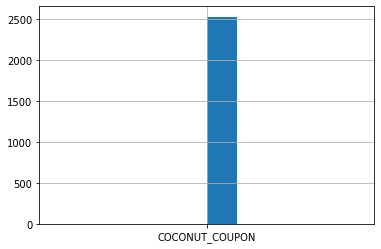

In [82]:
valentina_4["symbol"].hist()

<Axes: >

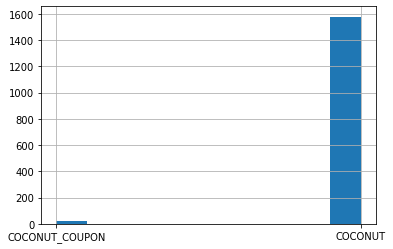

In [83]:
vinnie_4["symbol"].hist()